In [475]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)

# Заклинание, нужное для отрисовки графиков непосредственно в ноутбуке (подробнее в лекции 7)
%matplotlib inline
# Настройка стиля и размера графиков
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10.0, 6.0)
matplotlib.pyplot.style.use('ggplot')

# Базовый уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

## Задание 1.1

Загрузите первый лист (`curr`) из файла `data.xlsx` в `pd.DataFrame` (в этой таблице приведены курсы доллара (USD) и евро (EUR) в рублях).

In [476]:
df = pd.read_excel('data.xlsx', sheetname='curr')

In [477]:
df

,Date,USD,EUR
0,2013-06-22,32.7433,43.3489
1,2013-06-25,32.9097,43.1018
2,2013-06-26,32.7140,42.9698
3,2013-06-27,32.8876,42.9841
4,2013-06-28,32.8766,42.8349
...,...,...,...
983,2017-06-15,57.0303,63.9481
984,2017-06-16,57.4437,64.2795
985,2017-06-17,57.7408,64.4561
986,2017-06-20,57.9585,64.8614


In [478]:
print type(df)

<class 'pandas.core.frame.DataFrame'>


## Задание 1.2

Выведите на экран тип поля `Date`. Если это `datetime64[ns]` или `<M8[ns]` (по сути то же самое), то мы имеем дело с правильным форматом даты. Если нет, приведите этот столбец к типу `datetime`.

In [479]:
df.Date.dtypes

dtype('<M8[ns]')

## Задание 1.3

Выведите на экран минимальную и максимальную дату. Сколько всего дней содержится в наших данных? (*Hint: даты можно вычитать друг из друга*)

In [480]:
max_date = df.Date.max()
min_date = df.Date.min()
period = max_date - min_date + pd.Timedelta(days=1)
print "Максимальная дата: {}\nМинимальная дата: {}\nВсего дней: {}".format(max_date,min_date, period)

Максимальная дата: 2017-06-21 00:00:00
Минимальная дата: 2013-06-22 00:00:00
Всего дней: 1461 days 00:00:00


## Задание 1.4

Постройте на одном графике курс доллара и курс евро.

In [481]:
df = df.set_index('Date',inplace=False)
df.sort_index()

,USD,EUR
Date,,
2013-06-22,32.7433,43.3489
2013-06-25,32.9097,43.1018
2013-06-26,32.7140,42.9698
2013-06-27,32.8876,42.9841
2013-06-28,32.8766,42.8349
...,...,...
2017-06-15,57.0303,63.9481
2017-06-16,57.4437,64.2795
2017-06-17,57.7408,64.4561


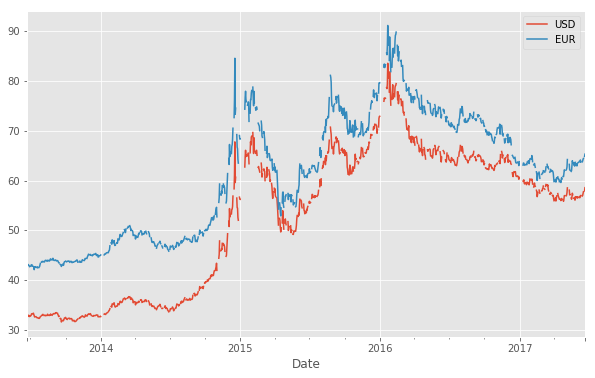

In [482]:
df.resample('1D').mean().plot()

## Задание 1.5

Найдите среднее значение курса евро в мае 2017 года.

In [483]:
print "Средний курс по заполненным дням: {:.2f}".format(df.loc['2017-05', 'EUR'].mean())
print "Средний курс по всем дням (в дни без заполненного курса проставляется предыдущий): {:.2f}".format(
    df.loc['2017-04':'2017-05', 'EUR'].resample('1D').ffill().loc['2017-05'].mean())

Средний курс по заполненным дням: 62.96
Средний курс по всем дням (в дни без заполненного курса проставляется предыдущий): 63.10


# Продвинутый уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

## Задание 2.1

Найдите долю дней, когда доллар растет.

In [484]:
print "Доля дней, когда доллар растет к заполненным дням: {:.2f}".format(
    (df.USD>df.USD.shift(1)).mean())

period = float((df.index.max()- df.index.min() + pd.Timedelta(days=1)).days)
print "Доля дней, когда доллар растет к общему числу дней в периоде (вар 1): {:.2f}".format(
    (df.USD>df.USD.shift(1)).sum()/period)

ddf = df.USD.resample('1D').ffill()
print "Доля дней, когда доллар растет к общему числу дней в периоде (вар 2): {:.2f}".format(
    (ddf>ddf.shift(1)).mean())

Доля дней, когда доллар растет к заполненным дням: 0.53
Доля дней, когда доллар растет к общему числу дней в периоде (вар 1): 0.36
Доля дней, когда доллар растет к общему числу дней в периоде (вар 2): 0.36


## Задание 2.2

Постройте гистограмму доходности доллара.

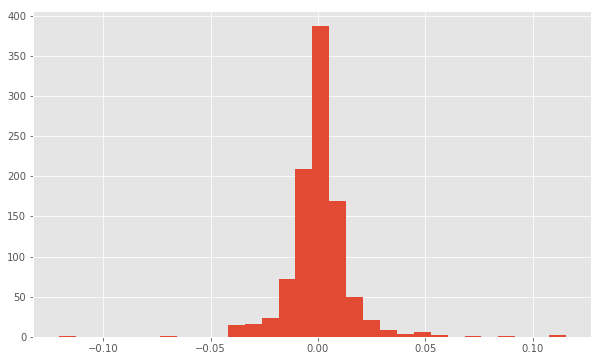

In [485]:
#гистограмма доходности по заполненным дням
((df.USD.shift(-1)-df["USD"] )/df["USD"]).hist(bins=30)

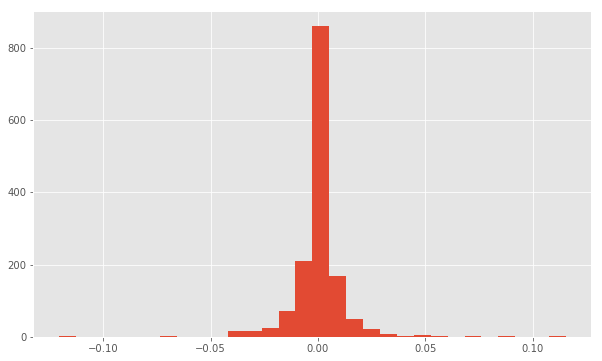

In [486]:
#гистограмма доходности по всем дням, включая незаполненные 
((ddf.shift(-1)-ddf )/ddf).hist(bins=30)

## Задание 2.3

Добавьте в таблицу новую колонку `Weekday` – день недели на русском языке, т.е. строку со значением `u'понедельник'`, `u'вторник'` и т.д. (*Hint: удобно воспользоваться атрибутом* `.dt`)

In [487]:
df["Weekday"]=df.index.weekday
df["Weekday"].replace([0,1,2,3,4,5,6],[u'понедельник', u'вторник', u'среда',
                                       u'четверг',u'пятница',u'суббота',u'воскресенье'],inplace=True)
df

,USD,EUR,Weekday
Date,,,
2013-06-22,32.7433,43.3489,суббота
2013-06-25,32.9097,43.1018,вторник
2013-06-26,32.7140,42.9698,среда
2013-06-27,32.8876,42.9841,четверг
2013-06-28,32.8766,42.8349,пятница
...,...,...,...
2017-06-15,57.0303,63.9481,четверг
2017-06-16,57.4437,64.2795,пятница
2017-06-17,57.7408,64.4561,суббота


## Задание 2.4

Рассчитайте корреляцию между курсами доллара и евро за весь доступный период (*Hint: в pandas уже встроена функция для расчета корреляций*).

In [488]:
print "pearson: {}".format(df['EUR'].corr(other=df['USD'] ,method='pearson'))
print "kendall: {}".format(df['EUR'].corr(other=df['USD'] ,method='kendall'))
print "spearman: {}".format(df['EUR'].corr(other=df['USD'] ,method='spearman'))

pearson: 0.982308925156
kendall: 0.896547622222
spearman: 0.982914535699


## Задание 2.5

Несколько лет назад курс евро отличался от курса доллара значительно сильнее, чем сейчас. Чтобы это визуализировать, вычислите курс евро к доллару (т.е. "сколько долларов стоит один евро") за каждый день. Постройте график курса евро к доллару за весь доступный период.

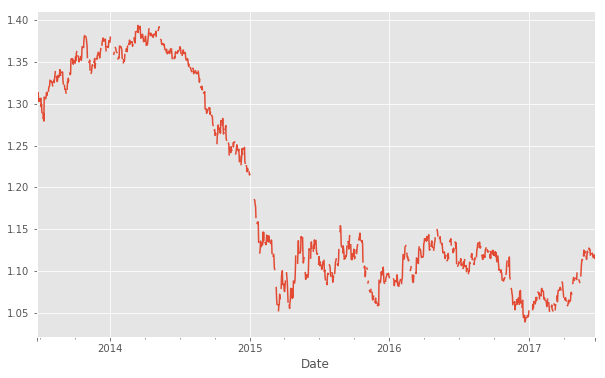

In [489]:
(df.EUR.resample('1D').mean()/df.USD.resample('1D').mean()).plot()

# Сложный уровень

*Для получения положительной оценки нужно правильно выполнить не менее 3 заданий из 5*

## Задание 3.1

Загрузите второй лист (`oil`) из файла `data.xlsx` в `pd.DataFrame` (в этой таблице приведены цены за баррель нефти Brent в долларах США).

In [490]:
oil=pd.read_excel('data.xlsx', sheetname='oil',index_col='dt')

In [491]:
oil

,Brent
dt,
2013-01-02,112.98
2013-01-03,113.03
2013-01-04,112.58
2013-01-07,112.49
2013-01-08,113.03
...,...
2017-06-06,48.11
2017-06-07,47.08
2017-06-08,46.30


## Задание 3.2

Объедините обе таблицы в одну. Итоговая таблица должна содержать дату в качестве индекса, а также поля `USD` (доллар), `EUR` (евро) и `Brent` (нефть). Обратите внимание, что периоды, за которые доступны данные, немного отличаются для курсов валют и для нефти. Нас интересует только тот период, когда и те, и другие данные присутствуют.

In [492]:
df2 = pd.merge(df[['USD','EUR']],oil,how='inner', left_index=True, right_index=True)
df2

,USD,EUR,Brent
2013-06-25,32.9097,43.1018,101.51
2013-06-26,32.7140,42.9698,100.62
2013-06-27,32.8876,42.9841,102.74
2013-06-28,32.8766,42.8349,102.49
2013-07-02,32.8517,42.8025,103.96
...,...,...,...
2017-06-02,56.5373,63.5310,48.46
2017-06-06,56.6152,63.8110,48.11
2017-06-07,56.6747,63.7817,47.08
2017-06-08,56.5878,63.7179,46.30


## Задание 3.3

- Постройте на одном графике курсы валют и цены не нефть. Поскольку цена на нефть имеет немного другой масштаб, используйте параметр `secondary_y='Brent'` для отображения дополнительной оси $y$ справа.
- Посчитайте попарные корреляции всех трех временных рядов за весь период.

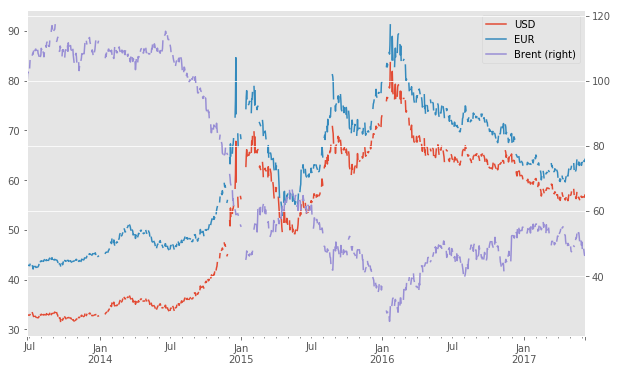

In [493]:
df2.resample('1D').mean().plot(secondary_y='Brent')

In [494]:
df2[ ['EUR','USD','Brent'] ].corr(method='pearson')

,EUR,USD,Brent
EUR,1.000000,0.982142,-0.938919
USD,0.982142,1.000000,-0.978950
Brent,-0.938919,-0.978950,1.000000


In [495]:
df2[ ['EUR','USD','Brent'] ].corr(method='kendall')

,EUR,USD,Brent
EUR,1.000000,0.897937,-0.741720
USD,0.897937,1.000000,-0.786345
Brent,-0.741720,-0.786345,1.000000


In [496]:
df2[ ['EUR','USD','Brent'] ].corr(method='spearman')

,EUR,USD,Brent
EUR,1.000000,0.983148,-0.914993
USD,0.983148,1.000000,-0.937176
Brent,-0.914993,-0.937176,1.000000


## Задание 3.4

Определите, в какие дни недели лучше покупать евро, а в какие – продавать. Для этого рассчитайте среднюю доходность евро в разные дни недели (т.е. нужно сгруппировать таблицу по дням недели и рассчитать среднее процентное изменение курса евро в каждой группе).

In [502]:
def get_action(m,c):
    if c<10:
        return "Нерепрезентативная выборка"
    if m<0:
        return "Продавать"
    return "Покупать";

#динамика курса на следующий заполненный день
df["EUR_dynamics"]=(df.EUR.shift(-1)-df.EUR)

act_table = df.groupby('Weekday').EUR_dynamics.agg(['mean','count'])
act_table["Action"]=act_table.apply(lambda x: get_action(x['mean'],x['count']), axis=1)
act_table

,mean,count,Action
Weekday,,,
воскресенье,-1.778400,1,Нерепрезентативная выборка
вторник,0.050734,190,Покупать
пятница,0.066335,200,Покупать
среда,0.008441,199,Покупать
суббота,0.103826,196,Покупать
четверг,-0.105400,201,Продавать


## Задание 3.5

Постройте график "скользящей корреляции" между курсами доллара и евро (таким образом можно найти периоды, когда курсы коррелировали слабее обычного и использовать это для арбитража). Для этого нужно взять скользящее окно (например, 60 последних значений) и рассчитать корреляцию USD - EUR внутри каждого такого окна.

/Users/mikhailrysev/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: pd.rolling_corr is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=60).corr(other=<Series>)
  if __name__ == '__main__':


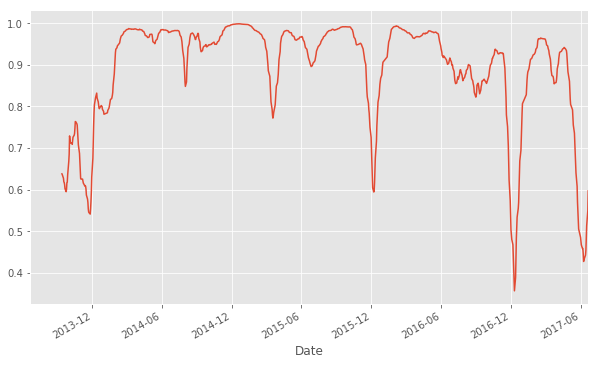

In [499]:
pd.rolling_corr(arg1=df['EUR'],arg2=df['USD'],window=60).plot()

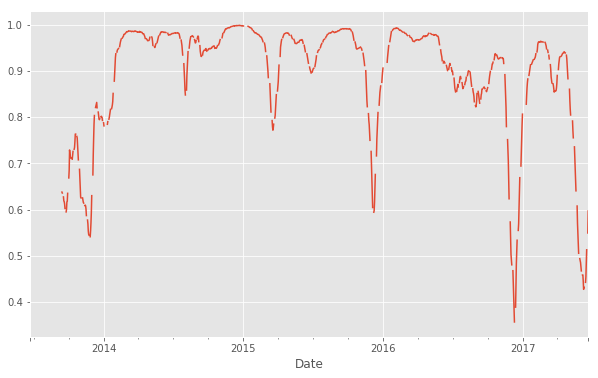

In [500]:
df['EUR'].rolling(window=60).corr(other=df['USD']).resample('1D').mean().plot()